<a href="https://colab.research.google.com/github/weso500/IOT-Anomaly-Detection/blob/main/Initial_Second_Level_Learner_Masked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import pickle
import itertools
from keras import layers
import random
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
x_train_raw = pd.read_csv('/content/Total_Train_Masked.csv' )

In [3]:
x_test_raw = pd.read_csv('/content/Total_Test.csv' )

In [6]:
# copy the data
x_train = x_train_raw.copy()

# apply normalization techniques
for column in x_train.columns:
    x_train[column] = x_train[column]  / x_train[column].abs().max()

x_train = x_train.fillna(0)
# view normalized data
display(x_train)

,A+_IGBT,A+IGBT,A-FLUX,B+_IGBT,B+IGBT,B-FLUX,C+_IGBT,C+IGBT,C-FLUX,CB-I,CB-V,DV_DT,MOD-I,MOD-V
0,0.000000,0.232635,0.584097,0.192040,0.106743,0.641985,0.161268,0.484116,0.693574,0.652679,0.259759,0.780274,0.624453,0.627959
1,0.000000,0.306985,0.561908,0.213554,0.122216,0.624018,0.193765,0.470397,0.657943,0.468046,0.240299,0.632599,0.574068,0.555342
2,0.000000,0.166880,0.569014,0.221367,0.098819,0.586780,0.153394,0.439980,0.661945,0.424754,0.322282,0.675194,0.459469,0.556684
3,0.000000,0.223887,0.551529,0.213703,0.112118,0.585918,0.162870,0.424168,0.690897,0.474592,0.603087,0.665855,0.362730,0.572859
4,0.000000,0.173820,0.567569,0.214513,0.110393,0.584625,0.159194,0.440125,0.712252,0.456738,0.510318,0.613086,0.429738,0.567760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.050244,0.178528,0.554515,0.215670,0.107742,0.618355,0.152379,0.446382,0.650420,0.405808,0.368998,0.562582,0.487814,0.521666
7496,0.045155,0.201177,0.553819,0.242020,0.108191,0.610202,0.155536,0.439814,0.648034,0.450676,0.262734,0.503849,0.495630,0.525401
7497,0.048442,0.175772,0.561059,0.194196,0.099594,0.592204,0.144387,0.440444,0.705461,0.559816,0.364537,0.621282,0.537216,0.560687
7498,0.037808,0.175201,0.546611,0.197737,0.097645,0.626551,0.186199,0.441027,0.643294,0.436295,0.234653,0.619487,0.450893,0.574164


In [7]:
# copy the data
x_test = x_test_raw.copy()

# apply normalization techniques
for column in x_test.columns:
    x_test[column] = x_test[column]  / x_test[column].abs().max()

# view normalized data
display(x_test)

,A+_IGBT,A+IGBT,A-FLUX,B+_IGBT,B+IGBT,B-FLUX,C+_IGBT,C+IGBT,C-FLUX,CB-I,CB-V,DV_DT,MOD-I,MOD-V
0,0.035548,0.083642,0.005526,0.009377,0.032217,0.008943,0.026285,0.028493,0.008875,0.016660,0.002353,0.114517,0.010791,0.002158
1,0.036939,0.083307,0.006872,0.009323,0.032537,0.006907,0.025470,0.027546,0.008009,0.018313,0.002236,0.130408,0.011482,0.002209
2,0.036932,0.070757,0.003839,0.008663,0.035992,0.010601,0.030578,0.030058,0.007891,0.016862,0.002605,0.092256,0.012101,0.002085
3,0.040868,0.077487,0.004862,0.009027,0.034075,0.011750,0.028126,0.030482,0.007928,0.015678,0.002374,0.098600,0.011549,0.002246
4,0.037238,0.072531,0.004618,0.008681,0.032469,0.008439,0.028620,0.028854,0.008737,0.014228,0.001820,0.098198,0.011612,0.002031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.384055,0.552015,0.136677,0.174608,0.486173,0.204585,0.230839,0.379807,0.107804,0.930850,0.006691,0.430013,0.099748,0.929822
196,0.018664,0.020851,0.002385,0.005637,0.010893,0.003567,0.008136,0.010015,0.002778,0.005796,0.001868,0.086727,0.004214,0.001079
197,1.000000,0.761462,1.000000,0.591888,1.000000,1.000000,1.000000,0.582568,1.000000,1.000000,0.006685,0.564482,0.100773,0.635610
198,0.021180,0.020398,0.001775,0.005181,0.010438,0.002657,0.007109,0.008014,0.002951,0.006118,0.001879,0.100117,0.006340,0.001082


In [8]:
x_train.shape

(7500, 14)

In [9]:
# Input layer
input = tf.keras.layers.Input(shape=(14,))
# Encoder layers
encoder = tf.keras.Sequential([
  layers.Dense(100, activation='relu'),
  layers.Dense(50, activation='relu'),
  layers.Dense(80, activation='relu'),
  layers.Dense(90, activation='relu'),
  layers.Dense(40, activation='relu')])(input)
# Decoder layers
decoder = tf.keras.Sequential([
      layers.Dense(40, activation="relu"),
      layers.Dense(50, activation="relu"),
      layers.Dense(100, activation="relu"),
      layers.Dense(90, activation='relu'),
      layers.Dense(14, activation="sigmoid")])(encoder)
# Create the autoencoder
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)

In [10]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mae')
# Fit the autoencoder
history = autoencoder.fit(x_train, x_train,
          epochs=20,
          batch_size = 1,
          validation_data=(x_train, x_train),
          shuffle=True)

Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 0.0678 - val_loss: 0.0528
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0515 - val_loss: 0.0496
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0473 - val_loss: 0.0439
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.0444 - val_loss: 0.0429
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.0435 - val_loss: 0.0419
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0426 - val_loss: 0.0420
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0424 - val_loss: 0.0475
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0423 - val_loss: 0.0433
Epoch 9/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.0420 - val_loss: 0.0432
Epoch 10/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0411 - val_loss: 0.0406
Epoch 11/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0407 - val_loss: 0.0415
Epoch 12/20
7500/75

In [15]:
x_test_raw_M = pd.read_csv('/content/Total_Test_A+_IGBT_Masked.csv' )
# copy the data
x_test_M = x_test_raw_M.copy()

# apply normalization techniques
for column in x_test_M.columns:
    x_test_M[column] = x_test_M[column]  / x_test_M[column].abs().max()

x_test_M = x_test_M.fillna(0)

# view normalized data
display(x_test_M)

,A+_IGBT,A+IGBT,A-FLUX,B+_IGBT,B+IGBT,B-FLUX,C+_IGBT,C+IGBT,C-FLUX,CB-I,CB-V,DV_DT,MOD-I,MOD-V
0,0.0,0.083642,0.005526,0.009377,0.032217,0.008943,0.026285,0.028493,0.008875,0.016660,0.002353,0.114517,0.010791,0.002158
1,0.0,0.083307,0.006872,0.009323,0.032537,0.006907,0.025470,0.027546,0.008009,0.018313,0.002236,0.130408,0.011482,0.002209
2,0.0,0.070757,0.003839,0.008663,0.035992,0.010601,0.030578,0.030058,0.007891,0.016862,0.002605,0.092256,0.012101,0.002085
3,0.0,0.077487,0.004862,0.009027,0.034075,0.011750,0.028126,0.030482,0.007928,0.015678,0.002374,0.098600,0.011549,0.002246
4,0.0,0.072531,0.004618,0.008681,0.032469,0.008439,0.028620,0.028854,0.008737,0.014228,0.001820,0.098198,0.011612,0.002031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.552015,0.136677,0.174608,0.486173,0.204585,0.230839,0.379807,0.107804,0.930850,0.006691,0.430013,0.099748,0.929822
196,0.0,0.020851,0.002385,0.005637,0.010893,0.003567,0.008136,0.010015,0.002778,0.005796,0.001868,0.086727,0.004214,0.001079
197,0.0,0.761462,1.000000,0.591888,1.000000,1.000000,1.000000,0.582568,1.000000,1.000000,0.006685,0.564482,0.100773,0.635610
198,0.0,0.020398,0.001775,0.005181,0.010438,0.002657,0.007109,0.008014,0.002951,0.006118,0.001879,0.100117,0.006340,0.001082


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[2.1731624e-02 1.1101463e-01 5.0595397e-01 ... 3.1717045e-07
  2.1251750e-01 5.0804502e-01]
 [2.0533599e-02 1.0745266e-01 5.0661957e-01 ... 3.2119933e-05
  2.1538477e-01 5.0993985e-01]
 [2.1552859e-02 1.1040162e-01 5.0576508e-01 ... 3.6237790e-07
  2.1186057e-01 5.0788546e-01]
 ...
 [8.7353069e-01 4.7342843e-01 7.9735196e-01 ... 6.9651687e-01
  4.9235907e-01 5.7078767e-01]
 [2.0739835e-02 1.0788284e-01 5.0426489e-01 ... 9.4678654e-08
  2.0675448e-01 5.0705236e-01]
 [7.9220898e-02 6.1643964e-01 7.5992799e-01 ... 6.3286352e-01
  6.9390619e-01 6.6615850e-01]]
The prediction loss threshold for 2% of outliers is 0.27


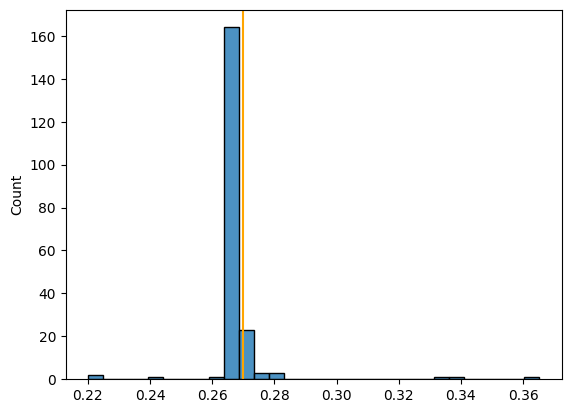

In [16]:
# Predict anomalies/outliers in the training dataset
prediction = autoencoder.predict(x_test_M)
print(prediction)
# Get the mean absolute error between actual and reconstruction/prediction
prediction_loss = tf.keras.losses.mae(prediction, x_test)
# Check the prediction loss threshold for 2% of outliers
loss_threshold = np.percentile(prediction_loss, 95)
#loss_threshold = 1.60782888
print(f'The prediction loss threshold for 2% of outliers is {loss_threshold:.2f}')
# Visualize the threshold
sns.histplot(prediction_loss, bins=30, alpha=0.8)
plt.axvline(x=loss_threshold, color='orange')

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       190
           1       0.60      0.60      0.60        10

    accuracy                           0.96       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.96      0.96      0.96       200



<Axes: >

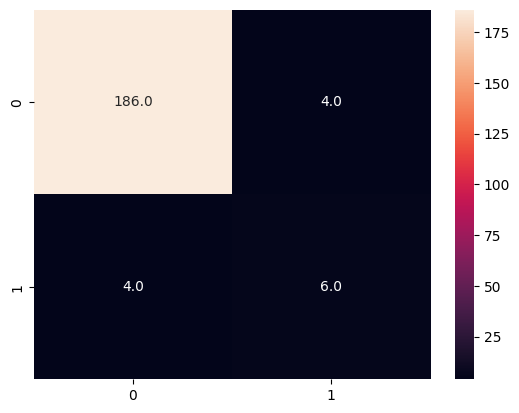

In [17]:
data = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
y_test = pd.DataFrame(data, columns=['Target'])
# Check the model performance at 2% threshold
threshold_prediction = [0 if i < loss_threshold else 1 for i in prediction_loss]
# # Check the prediction performance
print(classification_report(y_test, threshold_prediction))
cf_matrix = confusion_matrix(y_test, threshold_prediction)
sns.heatmap(cf_matrix, annot=True, fmt = ".1f")

[       inf 0.36519298 0.33531263 0.27992344 0.27405149 0.26757872
 0.26757047 0.2627732  0.2201428 ]
0.6494736842105262


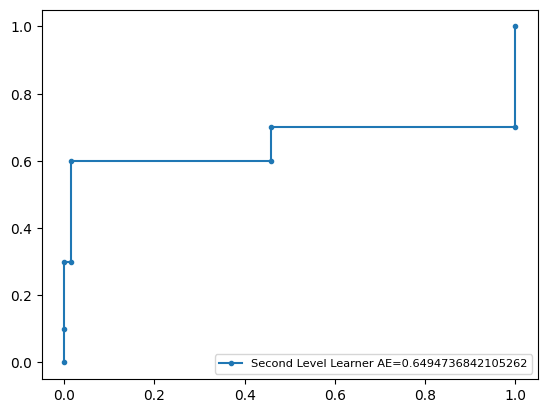

In [18]:
from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction_loss , pos_label=1)
print(thresholds)
#pyplot.plot(fpr, tpr, marker='.', label='Logistic')
auc = metrics.auc(fpr, tpr)
print(auc)

#plt.figure(0).clf()
#fpr, tpr, _ = metrics.roc_curve(y_test, prediction_loss)
#auc = round(metrics.roc_auc_score(y_test, prediction_loss), 4)
plt.plot(fpr,tpr,marker='.',label="Second Level Learner AE="+str(auc))
plt.legend(loc='lower right', prop={'size': 8.2})

In [12]:
pip install sewar

  Preparing metadata (setup.py) ... done
  Created wheel for sewar: filename=sewar-0.4.6-py3-none-any.whl size=11419 sha256=dcbe9e1de77d309ec38237087c7f42a017caf6213bfa2300fc18cd537a104f68
  Stored in directory: /root/.cache/pip/wheels/3f/af/02/9c6556ba287b62a945d737def09b8b8c35c9e1d82b9dfae84c
Successfully built sewar


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.10/dist-packages/sewar/utils.py:18: UserWarning: Supplied images have different dtypes float32 and float64
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

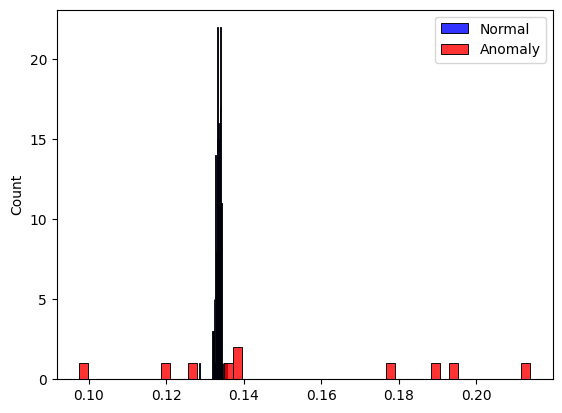

In [13]:
from urllib.request import AbstractBasicAuthHandler
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

mse_values = [] # Create an empty list to store mse values
mse_values_normal_plot = []
mse_values_anomaly_plot = []
prediction = []

for i in range(190):
  # Reshape to (1, 14) for single sample prediction
  input_data = x_test.iloc[i].values.reshape(1, -1)
  pred = autoencoder.predict(input_data)
  mse(pred, input_data)
  mse_values_normal_plot.append(mse(pred, input_data))

count = 190
for i in range(10):
  # Reshape to (1, 14) for single sample prediction
  input_data = x_test.iloc[count].values.reshape(1, -1)
  pred = autoencoder.predict(input_data)
  mse(pred, input_data)
  mse_values_anomaly_plot.append(mse(pred, input_data))
  count = count + 1


for i in range(len(x_test)):
  # Reshape to (1, 14) for single sample prediction
  input_data = x_test.iloc[i].values.reshape(1, -1)
  pred = autoencoder.predict(input_data)
  mse(pred, input_data)
  mse_values.append(mse(pred, input_data))

norm = [float(i)/sum(mse_values) for i in mse_values]

loss_threshold = np.percentile(mse_values, 95) # Calculate the threshold on the list of mse values
print(f'The prediction loss threshold for 5% of outliers is {loss_threshold:.2f}')

prediction = []
actual = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]

for i in range(len(mse_values)): # Use range() to generate indices
  if mse_values[i] > loss_threshold:
    prediction.append(1)
  else:
    prediction.append(0)

print(prediction)

# Visualize the threshold using the list of mse values
sns.histplot(mse_values_normal_plot, bins=50, alpha=0.8, color='blue', label='Normal')
sns.histplot(mse_values_anomaly_plot, bins=50, alpha=0.8, color='red', label='Anomaly')
#plt.axvline(x=loss_threshold, color='orange')
#plt.xlim([0.0, 0.0003])
plt.legend()
plt.show()

In [14]:
from sklearn.neighbors import LocalOutlierFactor


from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(x_test)
n_errors = (y_pred != actual).sum()
X_scores = clf.negative_outlier_factor_
print(X_scores)

[ -0.99110572  -1.25196288  -1.0296891   -1.03885695  -0.96504423
  -1.09507762  -1.09430261  -0.98103002  -0.96841096  -1.21905411
  -1.0408781   -2.07607005  -1.07505896  -1.34919868  -1.01798719
  -1.06697754  -1.35348274  -0.99284487  -1.28539822  -1.02720518
  -0.97681489  -1.07111194  -1.12547375  -0.97817553  -1.05949108
  -0.96865767  -1.04756437  -1.01120141  -1.00634319  -0.98019417
  -1.22465004  -0.96400615  -1.02848997  -1.02338974  -1.00055584
  -1.00538242  -5.82506159  -1.08641399  -1.06999354  -1.04302881
  -1.02639592  -1.04094454  -1.00020316  -1.25006168  -1.07934469
  -1.26635862  -1.02949511  -1.9253881   -1.04304556  -1.01283153
  -1.11226253  -1.50782341  -1.27350876  -1.91164863  -1.70051706
  -1.11678701  -1.06000852  -1.07950941  -1.0808191   -1.09671263
  -1.64610489  -1.11989602  -1.09069842  -1.07066929  -1.11891839
  -1.04091253  -1.08923752  -1.05355088  -1.05428409  -1.29125907
  -1.11267276  -1.14707956  -1.09369396  -1.16338565  -0.99444069
  -1.06134

[ 0.99110572  1.25196288  1.0296891   1.03885695  0.96504423  1.09507762
  1.09430261  0.98103002  0.96841096  1.21905411  1.0408781   2.07607005
  1.07505896  1.34919868  1.01798719  1.06697754  1.35348274  0.99284487
  1.28539822  1.02720518  0.97681489  1.07111194  1.12547375  0.97817553
  1.05949108  0.96865767  1.04756437  1.01120141  1.00634319  0.98019417
  1.22465004  0.96400615  1.02848997  1.02338974  1.00055584  1.00538242
  5.82506159  1.08641399  1.06999354  1.04302881  1.02639592  1.04094454
  1.00020316  1.25006168  1.07934469  1.26635862  1.02949511  1.9253881
  1.04304556  1.01283153  1.11226253  1.50782341  1.27350876  1.91164863
  1.70051706  1.11678701  1.06000852  1.07950941  1.0808191   1.09671263
  1.64610489  1.11989602  1.09069842  1.07066929  1.11891839  1.04091253
  1.08923752  1.05355088  1.05428409  1.29125907  1.11267276  1.14707956
  1.09369396  1.16338565  0.99444069  1.06134021  0.99263658  1.01187443
  1.10336955  1.08206995  1.22937825  1.11682662  1.

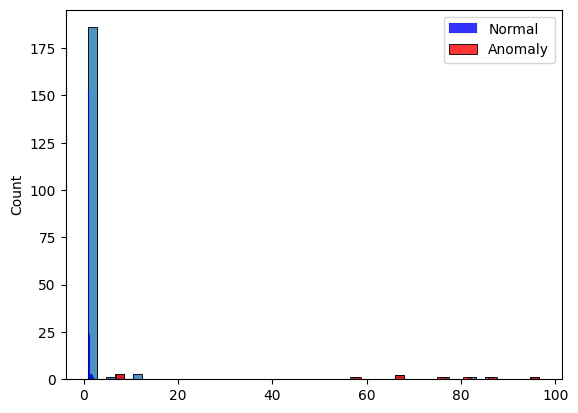

In [22]:
sns.histplot(X_scores, bins=50, alpha=0.8)
X_scores = abs(X_scores)
print(X_scores)

mse_values_normal_plot = []
mse_values_anomaly_plot = []

for i in range(190):
  mse_values_normal_plot.append(X_scores[i])


count = 190
for i in range(10):
  mse_values_anomaly_plot.append(X_scores[count])
  count = count + 1

sns.histplot(mse_values_normal_plot, bins=50, alpha=0.8, color='blue', label='Normal')
sns.histplot(mse_values_anomaly_plot, bins=50, alpha=0.8, color='red', label='Anomaly')
#plt.axvline(x=loss_threshold, color='orange')
#plt.xlim([0.0, 0.0003])
plt.legend()
plt.show()

[        inf 96.54229137 57.81790568 10.53446347  6.75621203  0.95978488]
0.9952631578947367


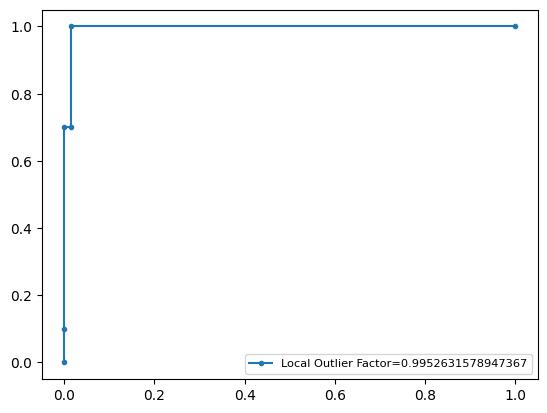

In [26]:
from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, thresholds = metrics.roc_curve(y_test, X_scores , pos_label=1)
print(thresholds)
#pyplot.plot(fpr, tpr, marker='.', label='Logistic')
auc = metrics.auc(fpr, tpr)
print(auc)

#plt.figure(0).clf()
#fpr, tpr, _ = metrics.roc_curve(y_test, prediction_loss)
#auc = round(metrics.roc_auc_score(y_test, prediction_loss), 4)
plt.plot(fpr,tpr,marker='.',label="Local Outlier Factor="+str(auc))
plt.legend(loc='lower right', prop={'size': 8.2})

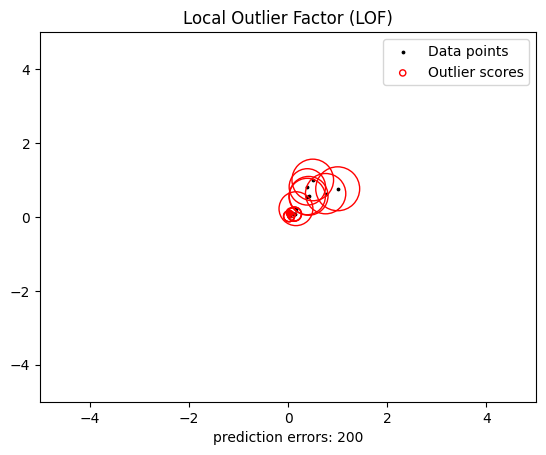

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])

x_test_array = x_test.values

plt.scatter(x_test_array[:, 0], x_test_array[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    x_test_array[:, 0],
    x_test_array[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()